In [1]:
import tensorflow as tf
import numpy as np

2022-12-31 13:21:42.259056: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
classes =[
'Tomato___Late_blight',
'Tomato___healthy',
'Grape___healthy',
'Orange___Haunglongbing_(Citrus_greening)',
'Soybean___healthy',
'Squash___Powdery_mildew',
'Potato___healthy',
'Corn_(maize)___Northern_Leaf_Blight',
'Tomato___Early_blight',
'Tomato___Septoria_leaf_spot',
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
'Strawberry___Leaf_scorch',
'Peach___healthy',
'Apple___Apple_scab',
'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
'Tomato___Bacterial_spot',
'Apple___Black_rot',
'Blueberry___healthy',
'Cherry_(including_sour)___Powdery_mildew',
'Peach___Bacterial_spot',
'Apple___Cedar_apple_rust',
'Tomato___Target_Spot',
'Pepper,_bell___healthy',
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
'Potato___Late_blight',
'Tomato___Tomato_mosaic_virus',
'Strawberry___healthy',
'Apple___healthy',
'Grape___Black_rot',
'Potato___Early_blight',
'Cherry_(including_sour)___healthy',
'Corn_(maize)___Common_rust_',
'Grape___Esca_(Black_Measles)',
'Raspberry___healthy',
'Tomato___Leaf_Mold',
'Tomato___Spider_mites Two-spotted_spider_mite',
'Pepper,_bell___Bacterial_spot',
'Corn_(maize)___healthy',
]

In [3]:
BATCH_SIZE = 100
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/Users/msughter/Downloads/tomato/train'
validation_dir = '/Users/msughter/Downloads/tomato/val'
# Image datagenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_datagenerator = train_datagen.flow_from_directory(
     train_dir,
        batch_size=BATCH_SIZE,
        shuffle=True,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
)

validation_datagenerator = validation_datagen.flow_from_directory(
    validation_dir,
     target_size=(IMG_HEIGHT, IMG_WIDTH),
        classes = classes,
        batch_size=BATCH_SIZE
)

Found 10000 images belonging to 38 classes.
Found 1000 images belonging to 38 classes.


In [5]:
# run some test
# load a single batch of images
image_batch, label_batch = next(train_datagenerator)
label_batch

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
# np.argmax(a, axis=1)
# converting one hot encoding to integers
np.argmax(label_batch,axis=1)

array([25, 14, 35, 14, 35, 34, 21, 34, 34, 34,  1, 34,  1, 34, 21, 25,  9,
       21,  0, 15, 35,  0,  8, 15,  1, 35, 34, 25, 21, 14,  1, 25, 35,  0,
       34,  1,  1,  8,  0, 25,  1, 34, 14, 25,  8,  0,  8, 35, 21, 35, 34,
        0, 21, 21, 15, 15, 35, 25, 15, 35, 21, 15, 25, 15, 14, 25, 34, 14,
        0, 14, 21, 34, 35, 34, 25, 21,  9, 34, 15, 14,  8,  8,  0,  1, 35,
       15,  9,  9, 25, 14, 15, 21, 15, 14,  1,  9, 15, 25,  0,  1])

In [7]:
# load the pretrained model
pretrained_model = tf.keras.models.load_model('/Users/msughter/projects/droneai/resources/my_final_model.h5')
# truncate the pretrainded model


2022-12-31 13:22:14.226521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
# build the feature extraction model from the pretrained model
feature_model = tf.keras.Model(inputs=pretrained_model.input,outputs=[pretrained_model.layers[-2].output])
feature_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224_input   [(None, 224, 224, 3)]    0         
 (InputLayer)                                                    
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 320)               409920    
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                             

In [9]:
# the feature model give an array output of 320
# testing the feature extraction model on a batch of data
# the length of all the predictions is supposed to be 100

predictions=feature_model.predict(image_batch)
predictions


4/4 [==============================] - 3s 411ms/step


array([[0.        , 0.        , 1.9386382 , ..., 0.        , 0.        ,
        0.        ],
       [0.07547886, 2.4799001 , 3.3378813 , ..., 0.        , 0.        ,
        0.        ],
       [0.5884386 , 1.6577394 , 2.0420718 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.7026092 , ..., 0.        , 0.        ,
        0.        ],
       [2.8621893 , 0.9351915 , 0.        , ..., 2.3857696 , 1.1902517 ,
        0.02827377],
       [0.        , 1.1208984 , 4.6608605 , ..., 0.        , 1.908951  ,
        0.        ]], dtype=float32)

In [10]:
len(predictions)

100

In [11]:
def extract_features(datagen,iterations):
    features = []
    labels = []
    i = 1
    for _,(image_batch,label_batch) in enumerate(datagen):
        if i > iterations:
            break
        print(f'extracting features for batch.....{i}')
        batch_features = feature_model.predict(image_batch)
        labels_list =  np.argmax(label_batch,axis=1)
        for img, label in zip(batch_features,labels_list):
            features.append(img)
            labels.append(label)
        i+=1
    return features, labels
        

In [13]:
train_x, train_y = extract_features(train_datagenerator,110)

extracting features for batch.....1
4/4 [==============================] - 2s 410ms/step
extracting features for batch.....2
4/4 [==============================] - 2s 408ms/step
extracting features for batch.....3
4/4 [==============================] - 2s 384ms/step
extracting features for batch.....4
4/4 [==============================] - 2s 412ms/step
extracting features for batch.....5
4/4 [==============================] - 2s 406ms/step
extracting features for batch.....6
4/4 [==============================] - 2s 399ms/step
extracting features for batch.....7
4/4 [==============================] - 2s 390ms/step
extracting features for batch.....8
4/4 [==============================] - 2s 397ms/step
extracting features for batch.....9
4/4 [==============================] - 2s 508ms/step
extracting features for batch.....10
4/4 [==============================] - 2s 572ms/step
extracting features for batch.....11
4/4 [==============================] - 1s 343ms/step
extracting features

In [14]:
validation_test_features,validation_test_labels = extract_features(validation_datagenerator,15)

extracting features for batch.....1
4/4 [==============================] - 2s 412ms/step
extracting features for batch.....2
4/4 [==============================] - 2s 471ms/step
extracting features for batch.....3
4/4 [==============================] - 2s 421ms/step
extracting features for batch.....4
4/4 [==============================] - 2s 494ms/step
extracting features for batch.....5
4/4 [==============================] - 2s 491ms/step
extracting features for batch.....6
4/4 [==============================] - 2s 429ms/step
extracting features for batch.....7
4/4 [==============================] - 2s 451ms/step
extracting features for batch.....8
4/4 [==============================] - 2s 433ms/step
extracting features for batch.....9
4/4 [==============================] - 2s 392ms/step
extracting features for batch.....10
4/4 [==============================] - 2s 395ms/step
extracting features for batch.....11
4/4 [==============================] - 2s 400ms/step
extracting features

In [15]:
from sklearn.model_selection import train_test_split
# we would use the sklearn train_test_split to 
# split the validation dataset into 95% test and 5% validation 
val_x,test_x,val_y, test_y= train_test_split(validation_test_features,validation_test_labels,test_size=0.95, random_state=42)

In [16]:
print(len(val_x))
print(len(test_x))
print(len(val_y))
print(len(test_y))

75
1425
75
1425


In [17]:
from sklearn import svm

rbf = svm.SVC(kernel='rbf', gamma=0.1, C=0.1).fit(train_x, train_y)

In [18]:
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(train_x, train_y)

In [19]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Accuracy (RBF Kernel):  20.00
F1 (RBF Kernel):  13.34


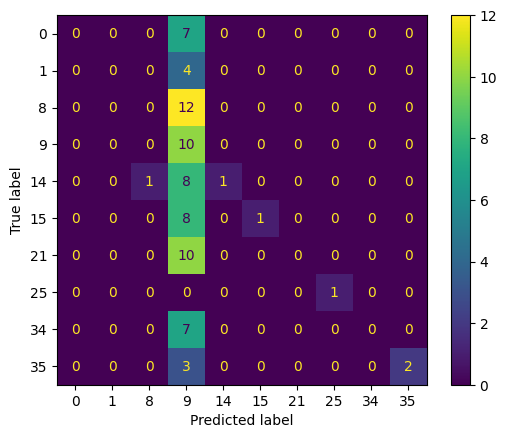

In [20]:

rbf_pred_val = rbf.predict(val_x)
rbf_accuracy_val = accuracy_score(val_y, rbf_pred_val)
rbf_f1_val = f1_score(val_y, rbf_pred_val, average='weighted')
cm = confusion_matrix(val_y,rbf_pred_val,labels=rbf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rbf.classes_)
disp.plot()
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_val*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_val*100))

Accuracy (RBF Kernel):  13.61
F1 (RBF Kernel):  7.91


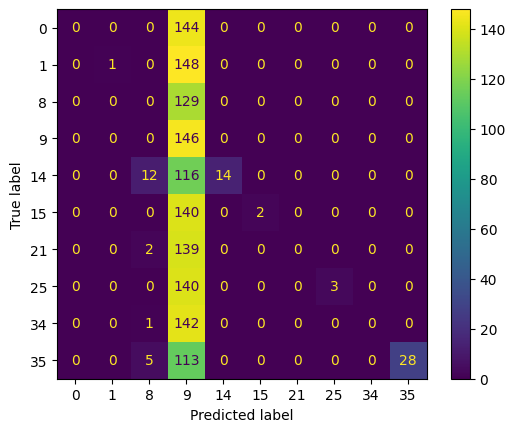

In [21]:

rbf_pred_test = rbf.predict(test_x)
rbf_accuracy_test = accuracy_score(test_y, rbf_pred_test)
rbf_f1_test = f1_score(test_y, rbf_pred_test, average='weighted')
cm = confusion_matrix(test_y, rbf_pred_test,labels=rbf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rbf.classes_)
disp.plot()
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy_test*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1_test*100))

Accuracy (RBF Kernel):  98.67
F1 (RBF Kernel):  98.67


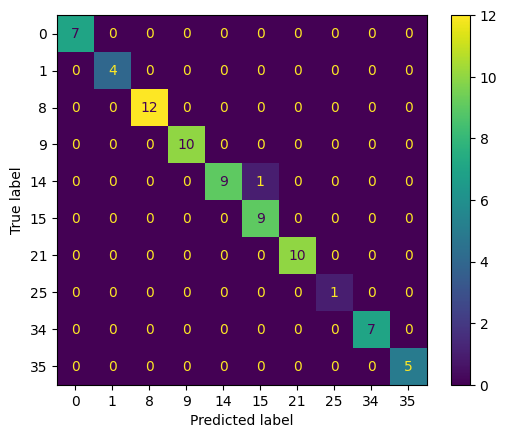

In [22]:

poly_pred_val = poly.predict(val_x)
poly_accuracy_val = accuracy_score(val_y, poly_pred_val)
poly_f1_val = f1_score(val_y, poly_pred_val, average='weighted')
cm = confusion_matrix(val_y, poly_pred_val,labels=poly.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly.classes_)
disp.plot()
print('Accuracy (RBF Kernel): ', "%.2f" % (poly_accuracy_val*100))
print('F1 (RBF Kernel): ', "%.2f" % (poly_f1_val*100))

Accuracy (RBF Kernel):  98.95
F1 (RBF Kernel):  98.95


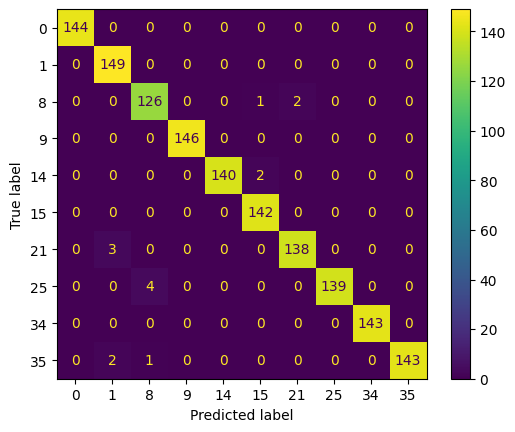

In [23]:

poly_pred_test = poly.predict(test_x)
poly_accuracy_test = accuracy_score(test_y, poly_pred_test)
poly_f1_test = f1_score(test_y, poly_pred_test, average='weighted')
cm = confusion_matrix(test_y, poly_pred_test,labels=poly.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly.classes_)
disp.plot()
print('Accuracy (RBF Kernel): ', "%.2f" % (poly_accuracy_test*100))
print('F1 (RBF Kernel): ', "%.2f" % (poly_f1_test*100))

In [24]:
# plotting learning curve
# add the validation data to the main training data

for feature,label in zip(val_x,val_y):
    train_x.append(feature)
    train_y.append(label)

In [25]:
print(f'The length of the training features is now {len(train_x)}')
print(f'The length of the training labels is now {len(train_y)}')

The length of the training features is now 11075
The length of the training labels is now 11075


In [26]:
from sklearn.model_selection import learning_curve,ShuffleSplit

# configure training model and parameters
poly_c = svm.SVC(kernel='poly', degree=3, C=1)

#
common_params = {
    "X": train_x,
    "y": train_y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "n_jobs": 4,
    "return_times": True,
}

train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    poly_c, **common_params
)

Text(0.5, 0, 'Number of training samples')

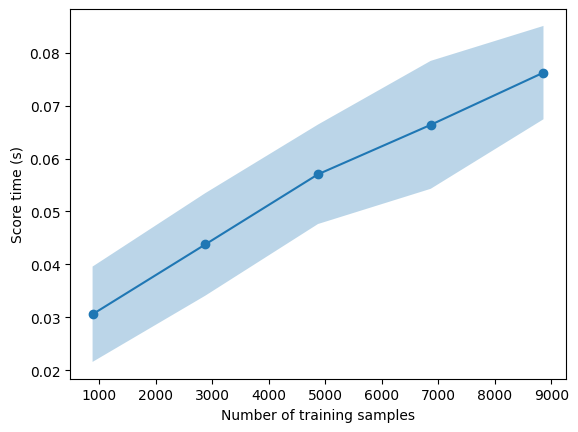

In [28]:
import matplotlib.pyplot as plt
# scalability regarding the score time
plt.plot(train_sizes, score_times_svm.mean(axis=1), "o-")
plt.fill_between(
    train_sizes,
    score_times_svm.mean(axis=1) - score_times_svm.std(axis=1),
    score_times_svm.mean(axis=1) + score_times_svm.std(axis=1),
    alpha=0.3,
)
plt.ylabel("Score time (s)")
plt.xlabel("Number of training samples")

Text(0.5, 1.0, 'Scalability of the SVC classifier')

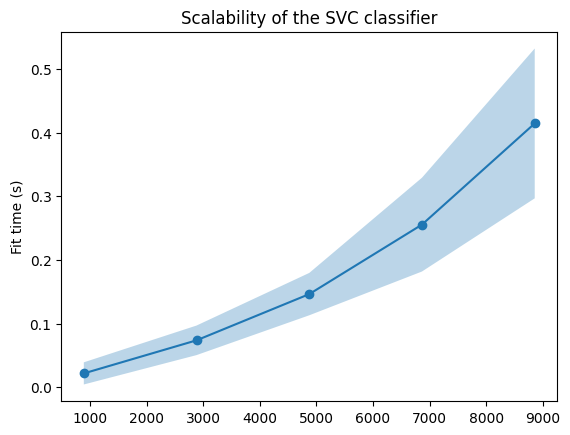

In [29]:
 # scalability regarding the fit time
plt.plot(train_sizes, fit_times_svm.mean(axis=1), "o-")
plt.fill_between(
    train_sizes,
    fit_times_svm.mean(axis=1) - fit_times_svm.std(axis=1),
    fit_times_svm.mean(axis=1) + fit_times_svm.std(axis=1),
    alpha=0.3,
)
plt.ylabel("Fit time (s)")
plt.title(
    f"Scalability of the {poly_c.__class__.__name__} classifier"
)

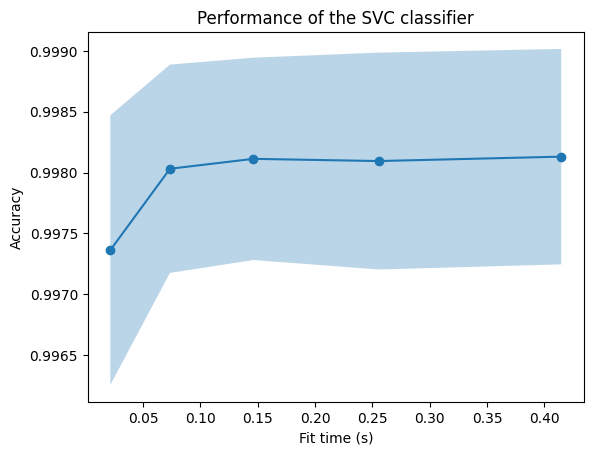

In [30]:
plt.plot(fit_times_svm.mean(axis=1), test_scores_svm.mean(axis=1), "o-")
plt.fill_between(
    fit_times_svm.mean(axis=1),
    test_scores_svm.mean(axis=1) - test_scores_svm.std(axis=1),
    test_scores_svm.mean(axis=1) + test_scores_svm.std(axis=1),
    alpha=0.3,
)
plt.ylabel("Accuracy")
plt.xlabel("Fit time (s)")
plt.title(
    f"Performance of the {poly_c.__class__.__name__} classifier"
)
plt.show()

In [31]:
# lets try tuning some parameters of svm with kernel
# change the degree to 2
poly2 = svm.SVC(kernel='poly', degree=2, C=1).fit(train_x, train_y)


Accuracy (Poly2 Kernel with degree 2):  100.00
F1 (Poly2 Kernel with degree 2):  100.00


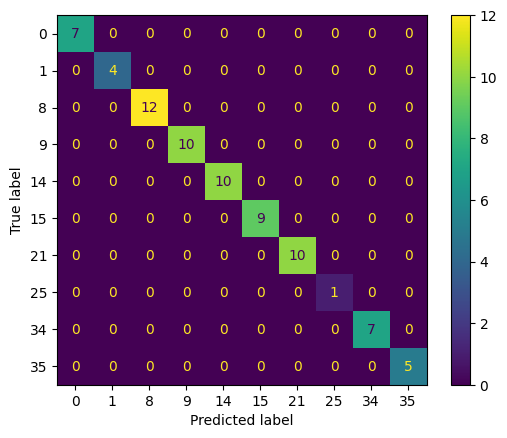

In [32]:

poly2_pred_val = poly2.predict(val_x)
poly2_accuracy_val = accuracy_score(val_y, poly2_pred_val)
poly2_f1_val = f1_score(val_y, poly2_pred_val, average='weighted')
cm = confusion_matrix(val_y, poly2_pred_val,labels=poly2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly2.classes_)
disp.plot()
print('Accuracy (Poly2 Kernel with degree 2): ', "%.2f" % (poly2_accuracy_val*100))
print('F1 (Poly2 Kernel with degree 2): ', "%.2f" % (poly2_f1_val*100))

Accuracy (Poly2 Kernel with degree 2):  99.51
F1 (Poly2 Kernel with degree 2):  99.51


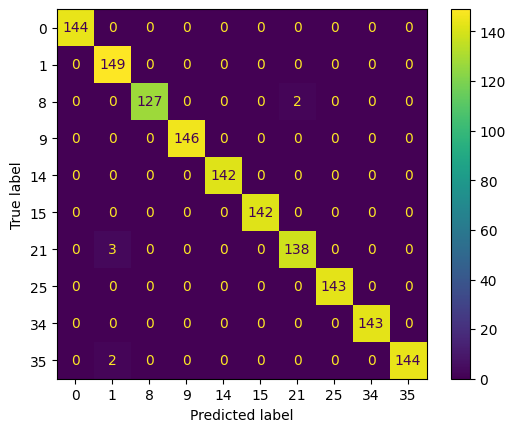

In [33]:

poly2_pred_test = poly2.predict(test_x)
poly2_accuracy_test = accuracy_score(test_y, poly2_pred_test)
poly2_f1_test = f1_score(test_y, poly2_pred_test, average='weighted')
cm = confusion_matrix(test_y, poly2_pred_test,labels=poly2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly2.classes_)
disp.plot()
print('Accuracy (Poly2 Kernel with degree 2): ', "%.2f" % (poly2_accuracy_test*100))
print('F1 (Poly2 Kernel with degree 2): ', "%.2f" % (poly2_f1_test*100))

In [34]:
# visualize the training curve
poly_2_c = svm.SVC(kernel='poly',degree=2)
train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    poly_2_c, **common_params
)

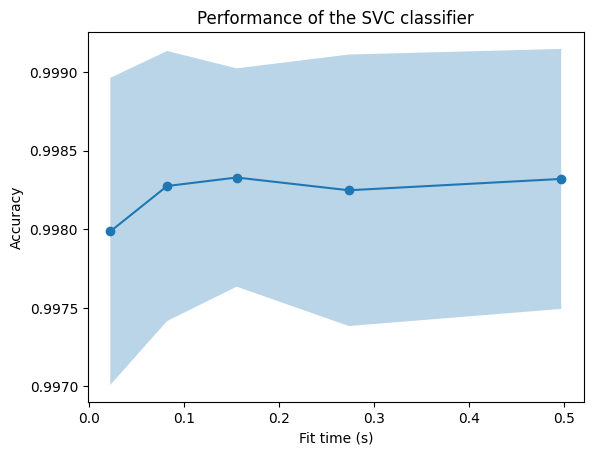

In [35]:
plt.plot(fit_times_svm.mean(axis=1), test_scores_svm.mean(axis=1), "o-")
plt.fill_between(
    fit_times_svm.mean(axis=1),
    test_scores_svm.mean(axis=1) - test_scores_svm.std(axis=1),
    test_scores_svm.mean(axis=1) + test_scores_svm.std(axis=1),
    alpha=0.3,
)
plt.ylabel("Accuracy")
plt.xlabel("Fit time (s)")
plt.title(
    f"Performance of the {poly_c.__class__.__name__} classifier"
)
plt.show()

In [36]:
# lets try tuning some parameters of svm with kernel
# change the degree to 1
poly1 = svm.SVC(kernel='poly', degree=1, C=1).fit(train_x, train_y)


Accuracy (Poly1 Kernel with degree 1):  100.00
F1 (Poly1 Kernel with degree 1):  100.00


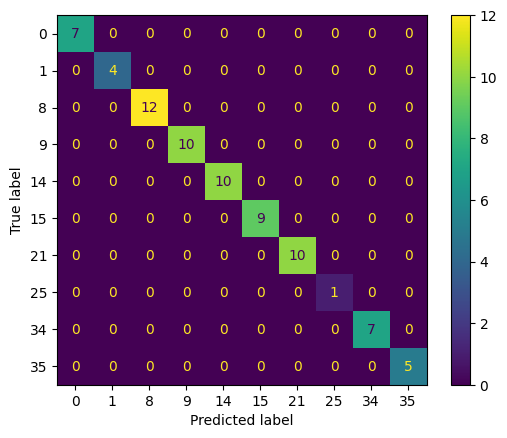

In [37]:

poly1_pred_val = poly1.predict(val_x)
poly1_accuracy_val = accuracy_score(val_y, poly1_pred_val)
poly1_f1_val = f1_score(val_y, poly1_pred_val, average='weighted')
cm = confusion_matrix(val_y, poly1_pred_val,labels=poly1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly1.classes_)
disp.plot()
print('Accuracy (Poly1 Kernel with degree 1): ', "%.2f" % (poly1_accuracy_val*100))
print('F1 (Poly1 Kernel with degree 1): ', "%.2f" % (poly1_f1_val*100))

Accuracy (Poly1 Kernel with degree 1):  99.30
F1 (Poly1 Kernel with degree 1):  99.30


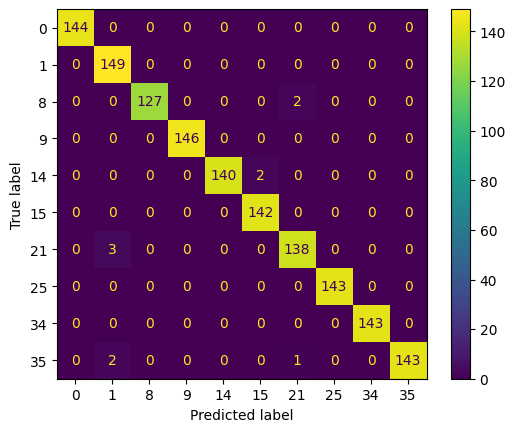

In [38]:

poly1_pred_test = poly1.predict(test_x)
poly1_accuracy_test = accuracy_score(test_y, poly1_pred_test)
poly1_f1_test = f1_score(test_y, poly1_pred_test, average='weighted')
cm = confusion_matrix(test_y, poly1_pred_test,labels=poly1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=poly1.classes_)
disp.plot()
print('Accuracy (Poly1 Kernel with degree 1): ', "%.2f" % (poly1_accuracy_test*100))
print('F1 (Poly1 Kernel with degree 1): ', "%.2f" % (poly1_f1_test*100))

In [39]:
# visualize the training curve
poly_1_c = svm.SVC(kernel='poly',degree=1)
train_sizes, _, test_scores_svm, fit_times_svm, score_times_svm = learning_curve(
    poly_1_c, **common_params
)

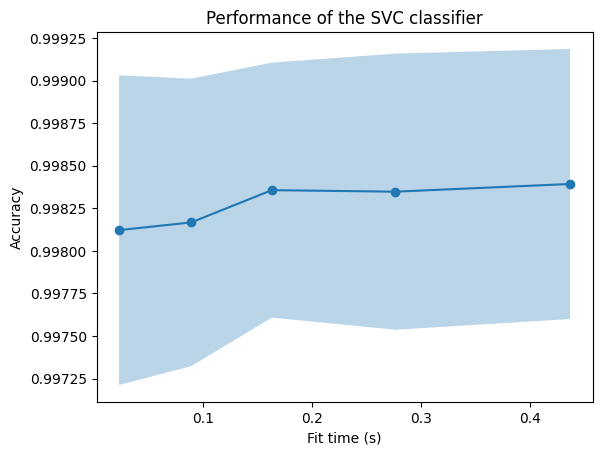

In [40]:
plt.plot(fit_times_svm.mean(axis=1), test_scores_svm.mean(axis=1), "o-")
plt.fill_between(
    fit_times_svm.mean(axis=1),
    test_scores_svm.mean(axis=1) - test_scores_svm.std(axis=1),
    test_scores_svm.mean(axis=1) + test_scores_svm.std(axis=1),
    alpha=0.3,
)
plt.ylabel("Accuracy")
plt.xlabel("Fit time (s)")
plt.title(
    f"Performance of the {poly_c.__class__.__name__} classifier"
)
plt.show()